<a href="https://colab.research.google.com/github/mohanrajmit/Image-Read/blob/master/thresholding_sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2

In [22]:
image = cv2.imread("/content/coins01.png")

In [23]:
image.shape

(308, 350, 3)

In [24]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


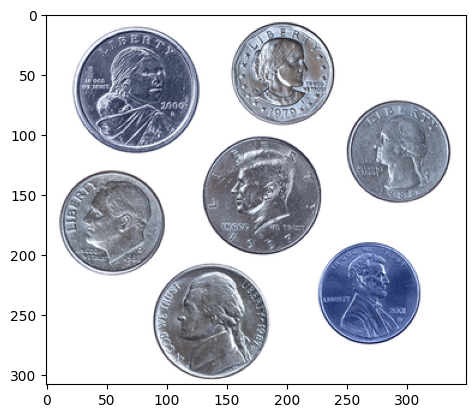

In [25]:
plt.imshow(image)

In [26]:
gray =cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [27]:
gray.shape

(308, 350)

In [28]:
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

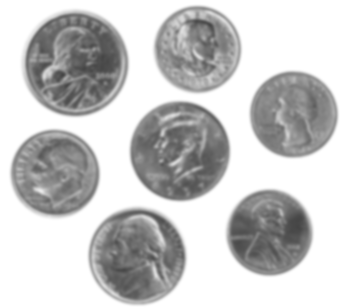

In [29]:
cv2_imshow(blurred)

In [30]:
(T, threshInv) = cv2.threshold(blurred, 105, 255, cv2.THRESH_BINARY)

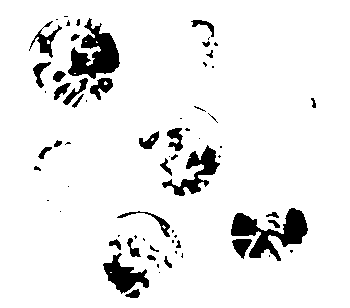

In [31]:
cv2_imshow(threshInv)

In [32]:
(T, threshInv_otsu) = cv2.threshold(blurred, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

In [33]:
T

191.0

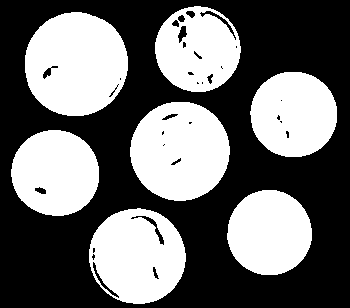

In [34]:
cv2_imshow(threshInv_otsu)

In [35]:
thresh_adap = cv2.adaptiveThreshold(blurred, 255,
	cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 15)

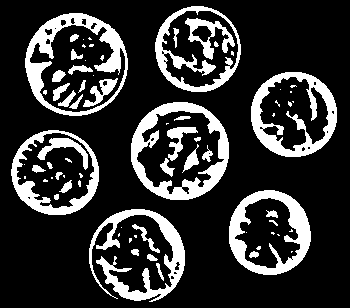

In [36]:
cv2_imshow(thresh_adap)

In [37]:
# compute gradients along the X and Y axis, respectively
gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)

# the `gX` and `gY` images are now of the floating point data type,
# so we need to take care to convert them back a to unsigned 8-bit
# integer representation so other OpenCV functions can utilize them
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

# combine the sobel X and Y representations into a single image
sobelCombined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)


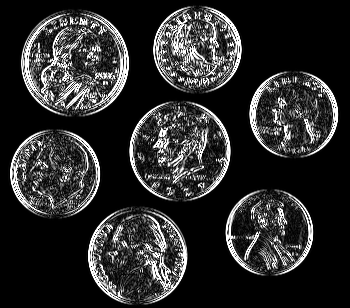

In [39]:
cv2_imshow(gX)

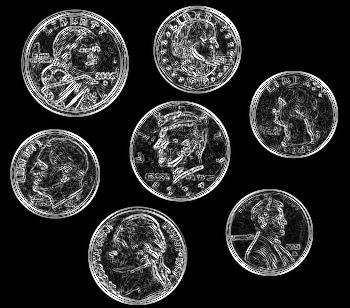

In [40]:
cv2_imshow(sobelCombined)